In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

gpu = False
if gpu:
    import sigkernel as ksig
else:
    import sigkernel_cpu as ksig

In [2]:
num_permutations = 1000
n_levels = 4
n_samples = 10
sample_len = 52
dt = 1 / 52
difference = True

static_kernel = ksig.static.kernels.LinearKernel()
sig_kernel = ksig.kernels.SignatureKernel(n_levels, n_levels, normalization=3, static_kernel=static_kernel)

In [3]:
X = ksig.tests.gen_GBM_path(mu=0.1, sigma=0.2, dt=dt, n_paths=n_samples, seq_len=sample_len).astype(np.float32)
Y = ksig.tests.gen_GBM_path(0.1, 0.4, dt, n_samples, sample_len).astype(np.float32)

In [4]:
K, diag = sig_kernel(X, diag=True)

In [5]:
K

array([[[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  1.000000

In [6]:
ksig.utils.matrix_diag(K)

array([[ 1.0000000e+00,  1.0000000e+00,  1.0000000e+00,  1.0000000e+00,
         1.0000000e+00,  1.0000000e+00,  1.0000000e+00,  1.0000000e+00,
         1.0000000e+00,  1.0000000e+00],
       [ 7.9386234e-02,  4.7740340e-02,  6.5754056e-03,  5.8078766e-04,
         4.9358964e-02,  8.1586838e-04,  2.5093555e-05,  7.5030088e-02,
         1.8864393e-02,  3.4610987e-02],
       [ 1.5755424e-03,  5.6978624e-04,  1.0809032e-05,  8.4021167e-08,
         6.0908188e-04,  1.6554077e-07,  1.6660806e-10,  1.4073813e-03,
         8.8966801e-05,  2.9948016e-04],
       [ 1.3897363e-05,  3.0224137e-06,  7.9107139e-09,  6.3502155e-12,
         3.3403282e-06, -6.5228489e-11, -7.7184483e-13,  1.1733082e-05,
         1.8646897e-07,  1.1516993e-06],
       [ 6.8953646e-08,  9.0181160e-09,  3.5467124e-12, -8.9138867e-15,
         1.0305039e-08, -1.6951850e-12,  5.4729397e-14,  5.5027236e-08,
         2.1974399e-10,  2.4913682e-09]], dtype=float32)

In [7]:
diag

array([[ 1.0000000e+00,  1.0000000e+00,  1.0000000e+00,  1.0000000e+00,
         1.0000000e+00,  1.0000000e+00,  1.0000000e+00,  1.0000000e+00,
         1.0000000e+00,  1.0000000e+00],
       [ 1.5755424e-03,  5.6978624e-04,  1.0809032e-05,  8.4021167e-08,
         6.0908188e-04,  1.6554077e-07,  1.6660806e-10,  1.4073813e-03,
         8.8966801e-05,  2.9948016e-04],
       [ 1.3897363e-05,  3.0224137e-06,  7.9107139e-09,  6.3502155e-12,
         3.3403282e-06, -6.5228489e-11, -7.7184483e-13,  1.1733082e-05,
         1.8646897e-07,  1.1516993e-06],
       [ 6.8953646e-08,  9.0181160e-09,  3.5467124e-12, -8.9138867e-15,
         1.0305039e-08, -1.6951850e-12,  5.4729397e-14,  5.5027236e-08,
         2.1974399e-10,  2.4913682e-09],
       [ 1.0000000e+00,  1.0000000e+00,  1.0000000e+00,  1.0000000e+00,
         1.0000000e+00,  1.0000000e+00,  1.0000000e+00,  1.0000000e+00,
         1.0000000e+00,  1.0000000e+00]], dtype=float32)

In [4]:
mmd_XY, null_mmd = ksig.tests.sig_kernel_test(X, Y, n_levels=n_levels, static_kernel=static_kernel, num_permutations=num_permutations)
ksig.tests.plot_permutation_samples(null_mmd, mmd_XY)

TypeError: sig_kernel_test() missing 1 required positional argument: 'static_kernel'

In [3]:
log_series = True
period = ['daily', 'weekly', 'monthly']
lens = [60, 52, 12]
for i, t in enumerate([252, 52, 12]):
    p_suffix = period[i]
    dt = 1 / t
    sample_len = lens[i]
    X = ksig.tests.gen_GBM_path(mu=0.1, sigma=0.2, dt=dt, n_paths=n_samples, seq_len=sample_len).astype(np.float32)
    if log_series:
        X = np.log(X)
    for mu in [0.05, 0.1, 0.15, 0.2]:
        Y = ksig.tests.gen_GBM_path(mu, 0.2, dt, n_samples, sample_len).astype(np.float32)
        if log_series:
            Y = np.log(Y)
        mmd_XY, null_mmd = ksig.tests.sig_kernel_test(X, Y, n_levels=n_levels, static_kernel=static_kernel, num_permutations=num_permutations)
        ksig.tests.plot_permutation_samples(null_mmd, mmd_XY)
        plt.savefig(f'./figures/n_{n_samples}_quantile_{p_suffix}_mu_{mu}.png')
        plt.clf()
        plt.close()
        ksig.tests.mmd_permutation_ratio_plot(X, Y, n_levels, static_kernel, n_steps=100)
        plt.savefig(f'./figures/n_{n_samples}_ratio_{p_suffix}_mu_{mu}.png')
        plt.clf()
        plt.close()

In [4]:
log_series = True
period = ['daily', 'weekly', 'monthly']
lens = [60, 52, 12]
for i, t in enumerate([252, 52, 12]):
    p_suffix = period[i]
    dt = 1 / t
    sample_len = lens[i]
    X = ksig.tests.gen_GBM_path(mu=0.1, sigma=0.2, dt=dt, n_paths=n_samples, seq_len=sample_len).astype(np.float32)
    if log_series:
        X = np.log(X)
    for sigma in [0.1, 0.2, 0.3, 0.4]:
        Y = ksig.tests.gen_GBM_path(0.1, sigma, dt, n_samples, sample_len).astype(np.float32)
        if log_series:
            Y = np.log(Y)
        mmd_XY, null_mmd = ksig.tests.sig_kernel_test(X, Y, n_levels=n_levels, static_kernel=static_kernel, num_permutations=num_permutations)
        ksig.tests.plot_permutation_samples(null_mmd, mmd_XY)
        plt.savefig(f'./figures/n_{n_samples}_quantile_{p_suffix}_sigma_{sigma}.png')
        plt.clf()
        plt.close()
        ksig.tests.mmd_permutation_ratio_plot(X, Y, n_levels, static_kernel, n_steps=100)
        plt.savefig(f'./figures/n_{n_samples}_ratio_{p_suffix}_sigma_{sigma}.png')
        plt.clf()
        plt.close()

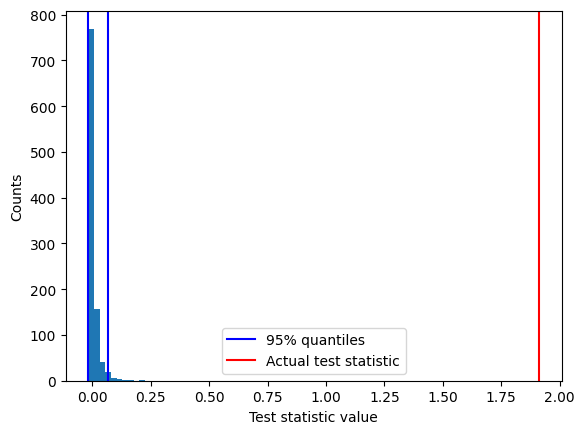

In [7]:
mmd_XY, null_mmd = ksig.tests.sig_kernel_test(np.log(X), np.log(Y), n_levels=n_levels, static_kernel=static_kernel, num_permutations=num_permutations)
ksig.tests.plot_permutation_samples(null_mmd, mmd_XY)

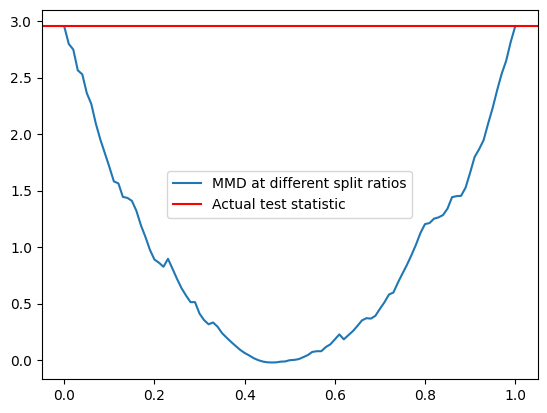

In [8]:
ksig.tests.mmd_permutation_ratio_plot(X, Y, n_levels, static_kernel, n_steps=100)

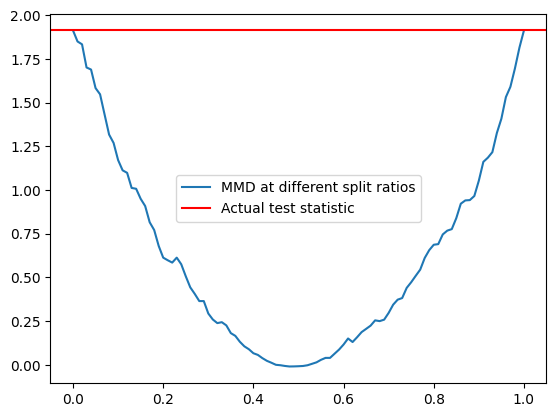

In [9]:
ksig.tests.mmd_permutation_ratio_plot(np.log(X), np.log(Y), n_levels, static_kernel, n_steps=100)